In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [2]:
data = pd.read_csv("data_clean.csv")


In [3]:
data.shape

(75804, 37)

In [4]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

In [5]:
data.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT
23130,A9839144412214736901,201812,375000.0,6250.000000,60,2,1,0,1,1,...,3.0,0,0,1,2.874742,0.129706,1.307935,-3.673940,40.428857,Salamanca
28060,A11743567218667261810,201812,302000.0,5921.568627,51,2,2,0,1,1,...,5.0,0,0,1,3.220834,0.245203,1.939164,-3.667381,40.424886,Salamanca
72698,A5184615705109803969,201806,167000.0,3340.000000,50,1,1,0,1,1,...,6.0,0,0,1,5.462247,0.320175,3.864152,-3.642960,40.432818,Ciudad Lineal
72170,A867095082347583060,201812,115000.0,1916.666667,60,3,1,0,1,0,...,6.0,0,0,1,7.124611,0.272820,4.202669,-3.691769,40.353247,Villaverde
14555,A3454320694510041357,201803,132000.0,1466.666667,90,3,1,1,0,0,...,7.0,0,0,1,5.055462,0.663913,4.149642,-3.742604,40.382112,Carabanchel
686,A9526953829353872484,201803,96000.0,4571.428571,21,1,1,0,0,0,...,6.0,0,1,0,0.640908,0.183579,0.917840,-3.703790,40.410833,Centro
67756,A4607948648764729798,201806,1331000.0,7005.263158,190,4,3,1,1,0,...,3.0,0,0,1,1.597318,0.416581,2.251822,-3.718094,40.425934,Moncloa-Aravaca
19130,A15743779113142202734,201809,173000.0,4942.857143,35,0,1,0,0,1,...,5.0,0,0,1,0.749880,0.219905,0.611235,-3.699921,40.410532,Centro
36007,A11893448954230647371,201809,1359000.0,7267.379679,187,4,3,0,1,0,...,3.0,0,1,0,1.784622,0.211793,0.626881,-3.684022,40.422113,Salamanca
57766,A9690766043821435960,201809,171000.0,1988.372093,86,2,2,1,1,0,...,4.0,1,0,0,11.480667,0.259578,9.442060,-3.592561,40.357780,Villa de Vallecas


In [ ]:
data_encoded = pd.get_dummies(data, columns=['DISTRICT'], drop_first=True)
data_encoded = data_encoded.dropna()

drop_cols = ['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'LONGITUDE', 'LATITUDE']
X = data_encoded.drop(columns=drop_cols)
y = data_encoded['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 97405.75
RMSE: 174209.50
R²: 0.8238


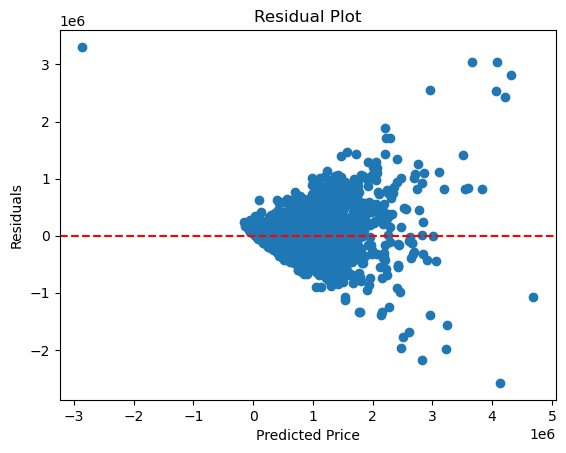

In [13]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

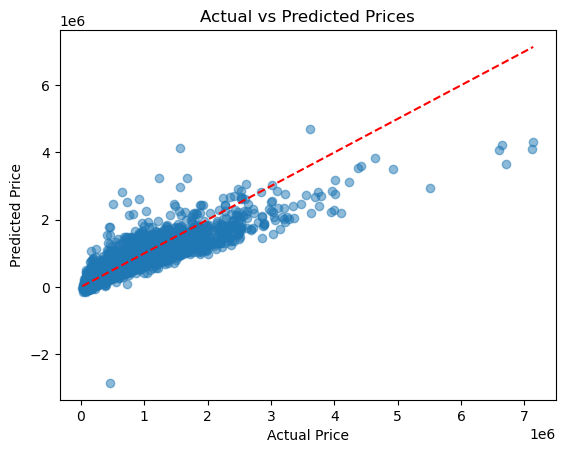

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparar datos (ya con get_dummies y sin NA)
data_encoded = pd.get_dummies(data, columns=['DISTRICT'], drop_first=True)
data_encoded = data_encoded.dropna()

drop_cols = ['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'LONGITUDE', 'LATITUDE']
X = data_encoded.drop(columns=drop_cols)
y = data_encoded['PRICE']

model = LinearRegression()

# Definir k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Obtener predicciones usando cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calcular métricas
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 98286.37
RMSE: 175505.87
R²: 0.8195


Ridge Regression:
MAE: 0.20
RMSE: 0.27
R²: 0.8684

Lasso Regression:
MAE: 0.33
RMSE: 0.42
R²: 0.6982



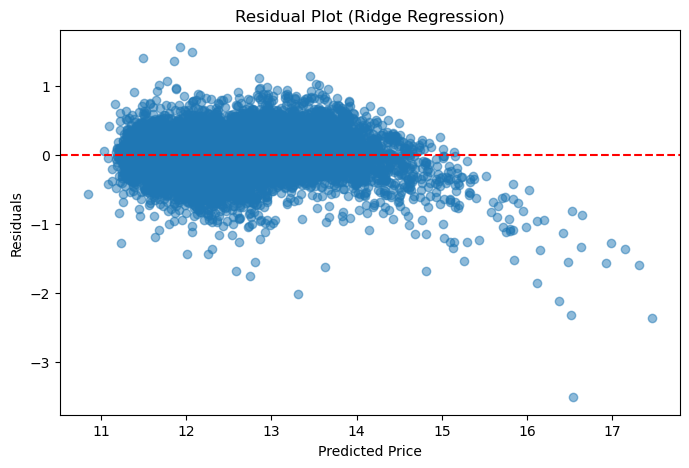

In [20]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

# Usamos tus datos ya preparados
# data_encoded, X_train, X_test, y_train, y_test

# ---------------------------
# 1. Modelo Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha es el parámetro de regularización
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}\n")

# ---------------------------
# 2. Modelo Lasso Regression
lasso = Lasso(alpha=0.1)  # puedes probar con diferentes valores de alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.4f}\n")

# ---------------------------
# 3. Análisis de residuos para el modelo Ridge (puedes hacerlo también para Lasso o LinearRegression)
residuals = y_test - y_pred_ridge

plt.figure(figsize=(8,5))
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()


In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definimos el espacio de valores alpha a probar
alpha_values = np.logspace(-4, 4, 50)  # desde 1e-4 hasta 1e4

ridge = Ridge()

param_grid = {'alpha': alpha_values}

# GridSearchCV para encontrar el mejor alpha usando 5 folds
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])

# Modelo con el mejor alpha
best_ridge = grid_search.best_estimator_

# Validación cruzada para evaluar rendimiento
cv_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

# Entrenar y evaluar en test
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Test set MAE: {mae:.2f}")
print(f"Test set RMSE: {rmse:.2f}")
print(f"Test set R²: {r2:.4f}")


Best alpha: 0.0001
Cross-validation R² scores: [0.87123822 0.83483769 0.87062135 0.87235101 0.87071813]
Mean CV R²: 0.8640
Test set MAE: 0.20
Test set RMSE: 0.27
Test set R²: 0.8684


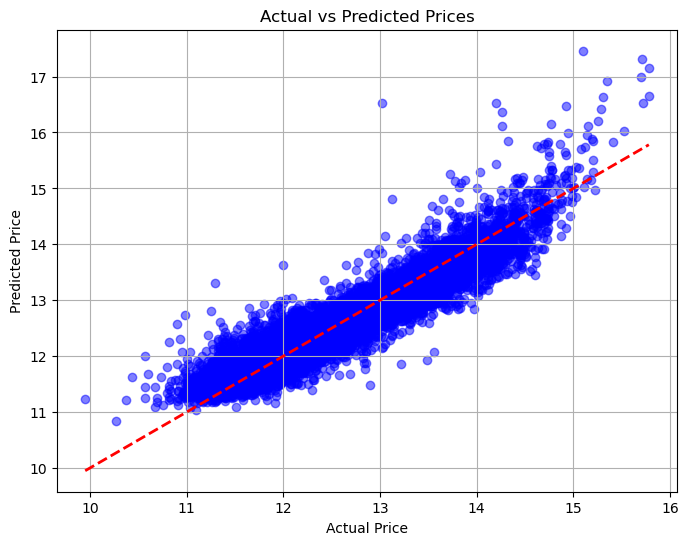

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Scatter plot: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # línea diagonal perfecta
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# 2. Importancia de coeficientes
coef = model.coef_
features = X.columns

# Ordenamos por valor absoluto de coeficiente
sorted_idx = np.argsort(np.abs(coef))[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], coef[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Ridge Regression')
plt.gca().invert_yaxis()  # para que el coef más alto aparezca arriba
plt.grid(axis='x')
plt.show()


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos (ajusta 'data_encoded' según tu dataframe ya procesado)
drop_cols = ['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'LONGITUDE', 'LATITUDE']
X = data_encoded.drop(columns=drop_cols)
y = data_encoded['PRICE']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo Ridge
model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas para comprobar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 1. Scatter plot: valores reales vs predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# 2. Importancia de variables (coeficientes)
coef = model.coef_
features = X.columns

# Ordenar variables por valor absoluto del coeficiente
sorted_idx = np.argsort(np.abs(coef))[::-1]

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], coef[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Ridge Regression')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


TypeError: got an unexpected keyword argument 'squared'